In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.examples.tutorials.mnist.input_data as input_data
from time import time
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\Administrator\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#parameters
learningrate=0.0001
trainEpochs = 30
batch_size = 100
totalBatchs = int(mnist.train.num_examples/batch_size)
epoch_list = []
accuracy_list = []
loss_list = []
model_path = "c:/pythonwork/CNN_model/Mnist_CNN_model.ckpt"

In [3]:
#define weight & bias
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),name='W')
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

#define layer
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [4]:
#Input layer
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float", shape=[None, 784], name='x')
    x_imge = tf.reshape(x, [-1,28,28,1])
    
#Conv_1
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1 = conv2d(x_imge, W1) + b1
    C1_Conv = tf.nn.relu(Conv1)
    
#Max_pool1
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)
    
#Conv_2
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2 = conv2d(C1_Pool, W2) + b2
    C2_Conv = tf.nn.relu(Conv2)
    
#Max_pool2
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)
    
#Flat layer
with tf.name_scope('D_flat'):
    D_flat = tf.reshape(C2_Pool, [-1, 1764])
    
#Hidden layer
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_flat, W3) + b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)
    
#Output layer
with tf.name_scope('Output_layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4) + b4)

In [5]:
#define Training
with tf.name_scope("optimizer"):
    y_label = tf.placeholder("float", shape=[None, 10], name="y_label")
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
                                   (logits=y_predict, labels = y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=learningrate).minimize(loss_function)

#Accuracy
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [6]:
epoch_list.clear()
loss_list.clear()
accuracy_list.clear()

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

saver = tf.train.Saver()

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_x,
                                       y_label: batch_y})
    loss,acc=sess.run([loss_function,accuracy],
                      feed_dict={x: mnist.validation.images,
                                 y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%02d' %(epoch+1), "Loss=", "{:.9f}".format(loss),
          "Accuracy=",acc)

save_path = saver.save(sess, model_path)

print("Accuracy:",sess.run(accuracy,feed_dict={x: mnist.validation.images,
                                               y_label: mnist.validation.labels}))
print("Model restores from file: %s" % save_path)

Train Epoch: 01 Loss= 1.631934643 Accuracy= 0.8586
Train Epoch: 02 Loss= 1.543197274 Accuracy= 0.93
Train Epoch: 03 Loss= 1.525804520 Accuracy= 0.943
Train Epoch: 04 Loss= 1.513621688 Accuracy= 0.9548
Train Epoch: 05 Loss= 1.507487655 Accuracy= 0.9576
Train Epoch: 06 Loss= 1.500666380 Accuracy= 0.9654
Train Epoch: 07 Loss= 1.498168945 Accuracy= 0.9652
Train Epoch: 08 Loss= 1.493633747 Accuracy= 0.971
Train Epoch: 09 Loss= 1.490835309 Accuracy= 0.9738
Train Epoch: 10 Loss= 1.488108754 Accuracy= 0.9766
Train Epoch: 11 Loss= 1.487486839 Accuracy= 0.975
Train Epoch: 12 Loss= 1.485705733 Accuracy= 0.9774
Train Epoch: 13 Loss= 1.485049367 Accuracy= 0.9786
Train Epoch: 14 Loss= 1.482295275 Accuracy= 0.9804
Train Epoch: 15 Loss= 1.484022260 Accuracy= 0.9794
Train Epoch: 16 Loss= 1.481147051 Accuracy= 0.9826
Train Epoch: 17 Loss= 1.478967786 Accuracy= 0.9838
Train Epoch: 18 Loss= 1.479470015 Accuracy= 0.9836
Train Epoch: 19 Loss= 1.478511214 Accuracy= 0.984
Train Epoch: 20 Loss= 1.478368998 Acc

In [7]:
prediction_test = sess.run(y_predict,feed_dict={x:mnist.test.images, \
                                                     y_label: mnist.test.labels})
print(prediction_test)
print(len(prediction_test))

[[1.8358196e-14 3.6523931e-13 4.6595137e-09 ... 1.0000000e+00
  7.2362150e-17 3.9922559e-17]
 [1.1762778e-12 1.7364873e-12 1.0000000e+00 ... 1.4007936e-17
  9.0708658e-13 1.2767969e-22]
 [2.0266195e-09 9.9999857e-01 3.4019965e-10 ... 9.2625169e-07
  3.4868685e-07 1.1931100e-12]
 ...
 [3.3213616e-22 2.8482893e-15 7.4002890e-21 ... 5.4208284e-11
  3.3304945e-12 2.9942923e-12]
 [2.3813256e-12 2.6759459e-20 2.2459441e-17 ... 8.5835738e-18
  1.3794735e-04 9.4793922e-18]
 [8.7866971e-11 1.2714095e-14 3.1679642e-12 ... 3.3759279e-24
  9.7286727e-12 1.4184239e-19]]
10000


In [8]:
prediction_result =sess.run(tf.argmax(y_predict,1),\
                            feed_dict={x:mnist.test.images,\
                                       y_label: mnist.test.labels})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

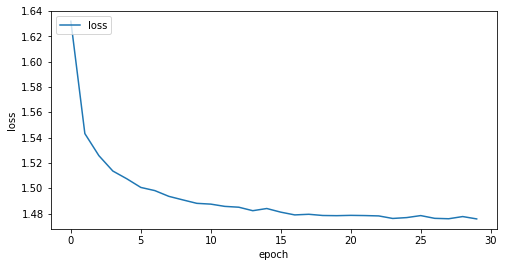

In [9]:
#Plot loss_function
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

<function matplotlib.pyplot.show>

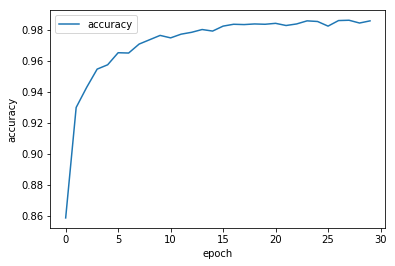

In [10]:
plt.plot(epoch_list, accuracy_list, label="accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show

In [11]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=25):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title = "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title += ",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

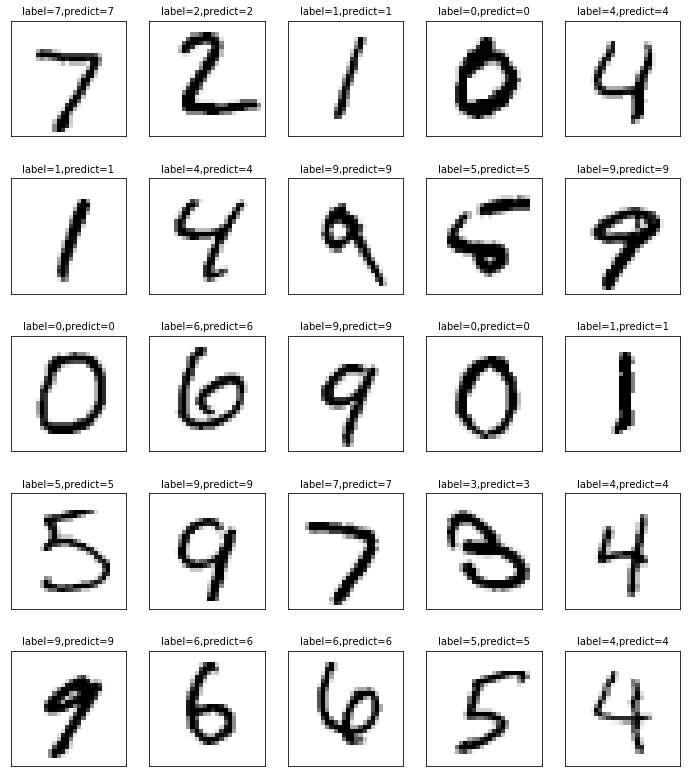

In [12]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,0)

In [13]:
##View probability
ans = tf.argmax(y_predict, 1)
picture = mnist.test.images[0:1]
with tf.Session() as sess:
    sess.run(init)
    
    saver.restore(sess, model_path)
    print("Restore!")
    
    print("Answer:",sess.run(ans, feed_dict={x: picture}))

INFO:tensorflow:Restoring parameters from c:/pythonwork/CNN_model/Mnist_CNN_model.ckpt
Restore!
Answer: [7]


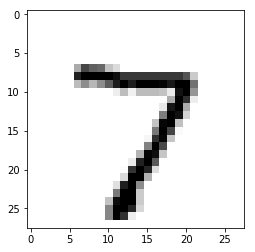

In [14]:
#prediction failure
labels = mnist.test.labels
images = mnist.test.images
test = np.reshape(images[0],(28,28))
plt.imshow(test,cmap='binary')
count =0
predict_fail_index = []
predict_fail_index.clear()
for i in range(10000):
    if np.argmax(labels[i]) != prediction_result[i]:
        count+=1
        predict_fail_index.append(i)
def plot_prediction_failure(images,labels,prediction,idx,num=25):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        number = predict_fail_index[idx]
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[number],(28,28)),cmap='binary')
        title = "label=" + str(np.argmax(labels[number]))
        if len(prediction)>0:
            title += ",predict="+str(prediction[number])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()


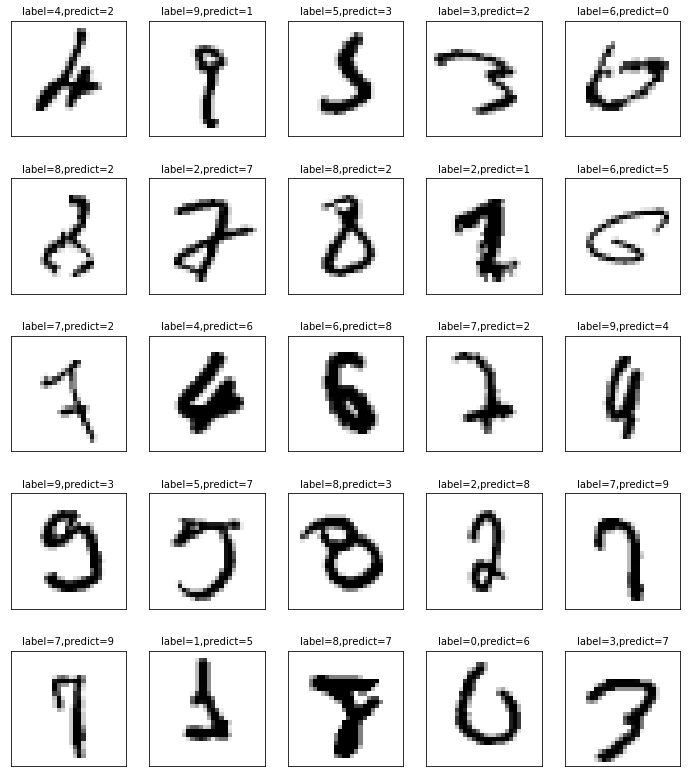

In [15]:
plot_prediction_failure(mnist.test.images,mnist.test.labels,prediction_result,0)